In [34]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Colab Notebooks/MyModel'
import sys
sys.path.append(root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import torch
import torchvision
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data
import os
import torch.nn.functional as F

#modules
from cifar10_models import resnet
import data_loader
import visualize
import train_model
import FGSM

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
#LOAD DATA
batch_size=4
trainloader, testloader, attributes=data_loader.load_cifar10(batch_size)
N_test=attributes["N_test"]
N_train=attributes["N_train"]
classes=attributes["class_names"]

Files already downloaded and verified
Files already downloaded and verified


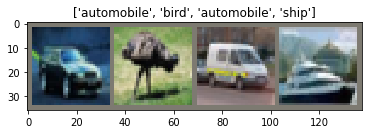

In [3]:
#VISUALIZE
inputs, class_data = next(iter(trainloader))
visualize.imshow(inputs, title=[classes[i] for i in class_data])

In [4]:
#load the pretrained resnet 18
model = resnet.resnet18(pretrained=True).to(device)
#train if necessary
#model_ft = train_model.train(model, trainloader, testloader,num_epochs=2, batch_size=batch_size)

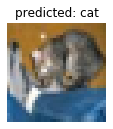

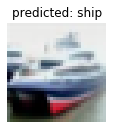

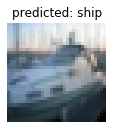

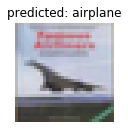

In [5]:
path="cifar10_models/state_dicts/resnet18.pt"
model.load_state_dict(torch.load(path,map_location=torch.device('cpu')));
model.eval();
visualize.visualize_model(model, testloader, classes, num_images=4)

## FGSM

In [7]:
FGSM.test(model, test_loader=testloader, epsilon=0.3)

KeyboardInterrupt: 